# Ejemplo K-S test

**Generamos una muestra de 10000 sucesos a partir de una distribución normal (de media 0 y varianza 1) y otra muestra según una distribución t Student con 5 grados de libertad.**

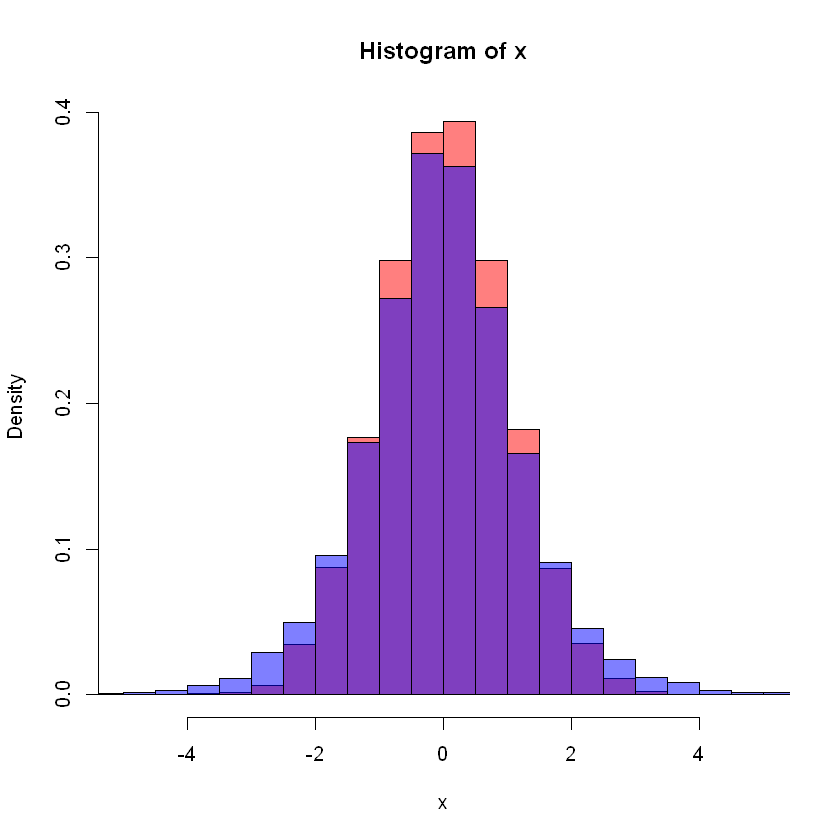

In [15]:
x <- rnorm(10000)
y <- rt(10000,5)
hist(x, freq=FALSE, col=rgb(1,0,0,0.5), breaks=seq(-5,5,by=0.5), xlim=c(-5,5))
hist(y, freq=FALSE, col=rgb(0,0,1,0.5), breaks=seq(-20,20,by=0.5), add=T)


**Imaginemos el caso en que no sabemos a partir de qué distribuciones de probabilidad se han generado, y la pregunta es si corresponden a la misma dsitribución. Para ello, aplicamos el test de Kolmogorov-Smirnov, que recordemos evaluará la mayor distancia, D, entre las funciones de densidad acumuladas de dichas muestras.**

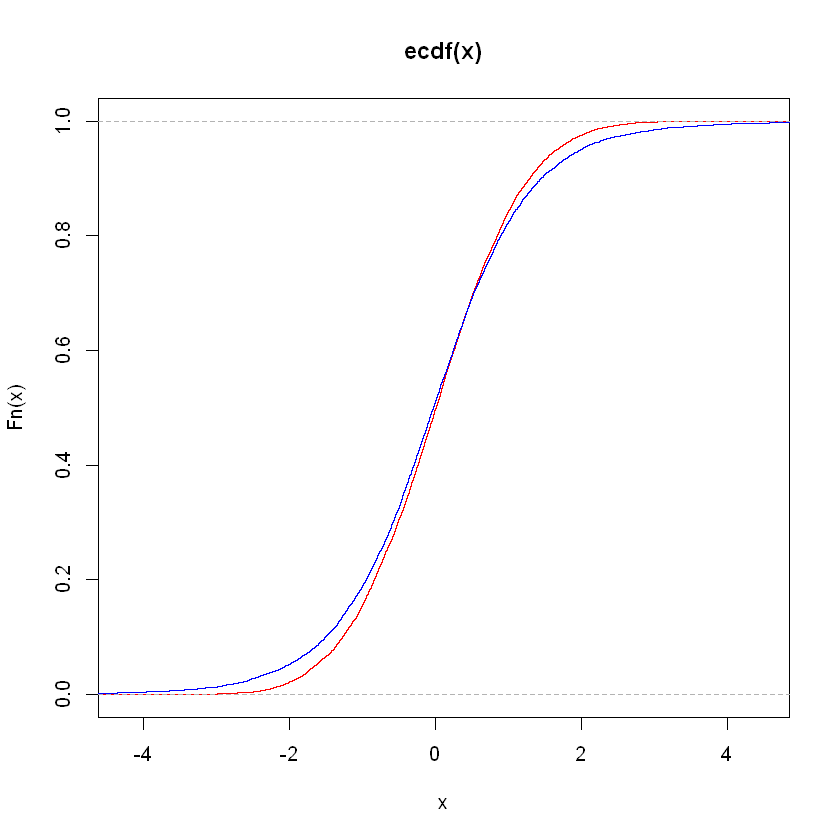

In [16]:
plot(ecdf(x), col=2)
lines(ecdf(y), col=4)

In [17]:
ks.test(x, y)


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.0376, p-value = 1.449e-06
alternative hypothesis: two-sided


**El p-value indica el porcentaje de veces que obtendríamos una D mayor en el caso de que provengan de la misma distribución. Para n=10000 y $\alpha=0.05$, debemos comparar con el valor crítico $D_{0.05, 10000}=1.36/\sqrt{n}=0.0136$. Por lo tanto, podemos rechazar la hipótesis de que corresponden a la misma distribución al haber obtenido un valor mayor de D.**

**También podríamos comparar cada distribución con un modelo teórico supuesto, por ejemplo, una normal.** 

In [18]:
ks.test(x,"pnorm", 0, 1)


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.0093124, p-value = 0.3511
alternative hypothesis: two-sided


In [19]:
ks.test(y,"pnorm", 0, 1)


	One-sample Kolmogorov-Smirnov test

data:  y
D = 0.034793, p-value = 6.116e-11
alternative hypothesis: two-sided


**Como vemos, la primera distribución, generada a partir de una normal, pasa el test, mientras que la segunda, generada a partir de la t-student, no lo hace.** 